In [78]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt

%matplotlib notebook

In [68]:
import pandas as pd

## Loading Reich Metadata 1240K (ancient) or Human Origins (HO)
The two files have awkward headers and different nr. columns.
Further, some QC is required.
Note that the corresponding plink files need to correspond to the chosen context HO/1240K, duh.

In [69]:
reichset = ['1240K', 'HO'][1]
if reichset=='1240K':
    columns2keep = [1,9, 12, 14]
elif reichset=='HO':
    columns2keep = [1, 5, 7, 9]
columnNames = 'Id Date Group_Label Country'.split()

reich=pd.read_csv(f"Reich/v44.3_{reichset}_public.anno", sep='\t')

reich = reich.iloc[:,columns2keep]

reich.columns = columnNames
## QC
reich = reich[~reich.Group_Label.str.startswith("Ignore_")]
reich = reich[~reich.Group_Label.str.endswith("_outlier")]

## Ancient subset
reichAncient = reich[reich.Date > 10]
print(reichAncient.shape)
reich = reich[['Id', 'Group_Label']].set_index('Id')
reich.columns = ['Population'] 


(5392, 4)


In [90]:
Counter(reichAncient.Group_Label)

Counter({'Vietnam_N_all': 4,
         'Vietnam_N_all_published': 1,
         'Vietnam_BA_all': 2,
         'Vanuatu_2300BP_all': 1,
         'Vietnam_N': 6,
         'Russia_Petrovka': 3,
         'Vietnam_N_published': 1,
         'Turkmenistan_Gonur_BA_1': 19,
         'Turkmenistan_Gonur_BA_1_o2': 2,
         'Turkmenistan_Gonur_BA_1_o3': 1,
         'Turkmenistan_Gonur_BA_2': 1,
         'Vietnam_BA': 2,
         'Iran_C_TepeHissar': 11,
         'Pakistan_Medieval_Udegram_Ghaznavid_father.or.son.I2959': 1,
         'Kazakhstan_MLBA_Dali': 3,
         'Kazakhstan_LBA_Tasbas': 1,
         'Spain_NazariPeriod_Muslim': 4,
         'Spain_Roman': 5,
         'Spain_Roman_published': 2,
         'Spain_BellBeaker_oAfrican_published': 1,
         'Vanuatu_2300BP': 1,
         'Israel_MLBA_lc': 9,
         'Israel_MLBA': 32,
         'Czech_CordedWare': 7,
         'England_MBA_sister.I1780': 1,
         'England_LBA_lowEEF': 2,
         'Czech_BellBeaker_brother.I7278': 1,
         'Czec

In [70]:
reichLL = pd.read_csv(f'Metadata/reichLL_{reichset}.csv', index_col=0)
reichLL.head()

,Id,Date,Group_Label,Country,Lat,Long,Distance2Yemen
0,MAL-005,0,Malawi_Yao,Malawi,-14.166667,34.33333,3542.983099
1,MAL-009,0,Malawi_Yao,Malawi,-14.862605,35.574122,3567.748080
2,MAL-011,0,Malawi_Chewa,Malawi,-14.862605,35.574122,3567.748080
3,MAL-012,0,Malawi_Chewa,Malawi,-13.750000,34.5,3493.289183
4,MAL-014,0,Malawi_Chewa,Malawi,-13.703473,33.597743,3526.385041


In [71]:
yemenMeta = pd.read_csv('Metadata/yemenRegions.csv', index_col='Id')
yemenMeta.columns = ['Population']
yemenMeta

,Population
Id,
3577STDY6068360,Dal
3577STDY6068361,Ibb
3577STDY6068362,Rsa
3577STDY6068363,Rsa
3577STDY6068364,Rsa
...,...
3577STDY6068635,Tiz
3577STDY6068640,Rsa
3577STDY6068641,Ibb


In [72]:
meta = pd.concat([yemenMeta, reich])
meta

,Population
Id,
3577STDY6068360,Dal
3577STDY6068361,Ibb
3577STDY6068362,Rsa
3577STDY6068363,Rsa
3577STDY6068364,Rsa
...,...
VK94.SG,Denmark_Viking.SG
VK95.SG,Iceland_Viking.SG
VK98.SG,Iceland_Viking.SG


In [92]:
imiss = pd.read_csv(f'Missingness/yemen_clean_reich{reichset}4.imiss', delim_whitespace=True)
#imiss = pd.read_csv('Missingness/yemen_reichHO_mind0.1_geno0.2.imiss', delim_whitespace=True)
imiss['Id'] = [iid.split('_')[-1] for iid in imiss['IID']]
imiss.set_index('Id', inplace=True)
imiss.tail()

,FID,IID,MISS_PHENO,N_MISS,N_GENO,F_MISS
Id,,,,,,
3577STDY6068568,urn:wtsi:402769_H09_3577STDY6068568,urn:wtsi:402769_H09_3577STDY6068568,Y,54,118286,0.000457
3577STDY6068600,urn:wtsi:402769_H10_3577STDY6068600,urn:wtsi:402769_H10_3577STDY6068600,Y,61,118286,0.000516
3577STDY6068625,urn:wtsi:402769_H11_3577STDY6068625,urn:wtsi:402769_H11_3577STDY6068625,Y,60,118286,0.000507
3577STDY6068642,urn:wtsi:402769_H12_3577STDY6068642,urn:wtsi:402769_H12_3577STDY6068642,Y,38,118286,0.000321
3577STDY6068643,urn:wtsi:402770_A01_3577STDY6068643,urn:wtsi:402770_A01_3577STDY6068643,Y,54,118286,0.000457


In [ ]:
imiss1 = imiss.join(meta).dropna(subset=['Population'])
imiss1a = imiss1[imiss1.Population.isin(set(reichAncient.Group_Label))]

In [94]:
imiss1a.sort_values(by="F_MISS", ascending=False)

,FID,IID,MISS_PHENO,N_MISS,N_GENO,F_MISS,Population
Id,,,,,,,
ETM003,12263,ETM003,Y,118214,118286,0.999400,Syria_Ebla_EMBA_IA_lc
ETM025,12276,ETM025,Y,118201,118286,0.999300,Syria_Ebla_EMBA_lc
ETM017,12272,ETM017,Y,118193,118286,0.999200,Syria_Ebla_EMBA_lc
I4933,8373,I4933,N,118189,118286,0.999200,Italy_Sicily_BellBeaker_possmisdated_lc
doo001.SG,8731,doo001.SG,Y,118157,118286,0.998900,South_Africa_2000BP_lc.SG
...,...,...,...,...,...,...,...
PB675.SG,12740,PB675.SG,N,3,118286,0.000025,Ireland_MN.SG
BR2.SG,4837,BR2.SG,N,3,118286,0.000025,Hungary_LBA_Kyjatice.SG
USR1.SG,8942,USR1.SG,N,3,118286,0.000025,USA_Ancient_Beringian.SG


In [98]:
Counter(imiss1a[imiss1a.F_MISS<0.5].Population).most_common()

[('Sweden_Viking.SG', 61),
 ('Dominican_LaCaleta_Ceramic', 48),
 ('Denmark_Viking.SG', 39),
 ('Estonia_EarlyViking.SG', 34),
 ('Italy_Imperial.SG', 29),
 ('Scotland_N', 25),
 ('England_Viking.SG', 25),
 ('France_MN', 24),
 ('Czech_BellBeaker', 24),
 ('Norway_Viking.SG', 24),
 ('Serbia_IronGates_Mesolithic', 23),
 ('Ireland_MN.SG', 21),
 ('Pakistan_Loebanr_IA', 21),
 ('Cuba_CanimarAbajo_Archaic', 20),
 ('Taiwan_Hanben_IA', 19),
 ('Turkey_Alalakh_MLBA', 17),
 ('Germany_BellBeaker', 17),
 ('Spain_C', 17),
 ('Italy_Medieval_EarlyModern.SG', 16),
 ('Russia_Afanasievo', 15),
 ('Dominican_Atajadizo_Ceramic', 15),
 ('Jordan_LBA', 15),
 ('Italy_LA.SG', 15),
 ('England_BellBeaker', 14),
 ('Latvia_HG', 14),
 ('Russia_Ekven_OldBeringSea', 14),
 ('Mongolia_EIA_Sagly_4', 13),
 ('Spain_MLN', 12),
 ('Turkey_N', 12),
 ('Mongolia_EIA_SlabGrave_1', 12),
 ('England_N', 12),
 ('Iceland_Viking.SG', 12),
 ('Turkey_Arslantepe_LateC', 11),
 ('Pakistan_Katelai_IA', 11),
 ('England_C_EBA', 11),
 ('Italy_Sardinia

<IPython.core.display.Javascript object>


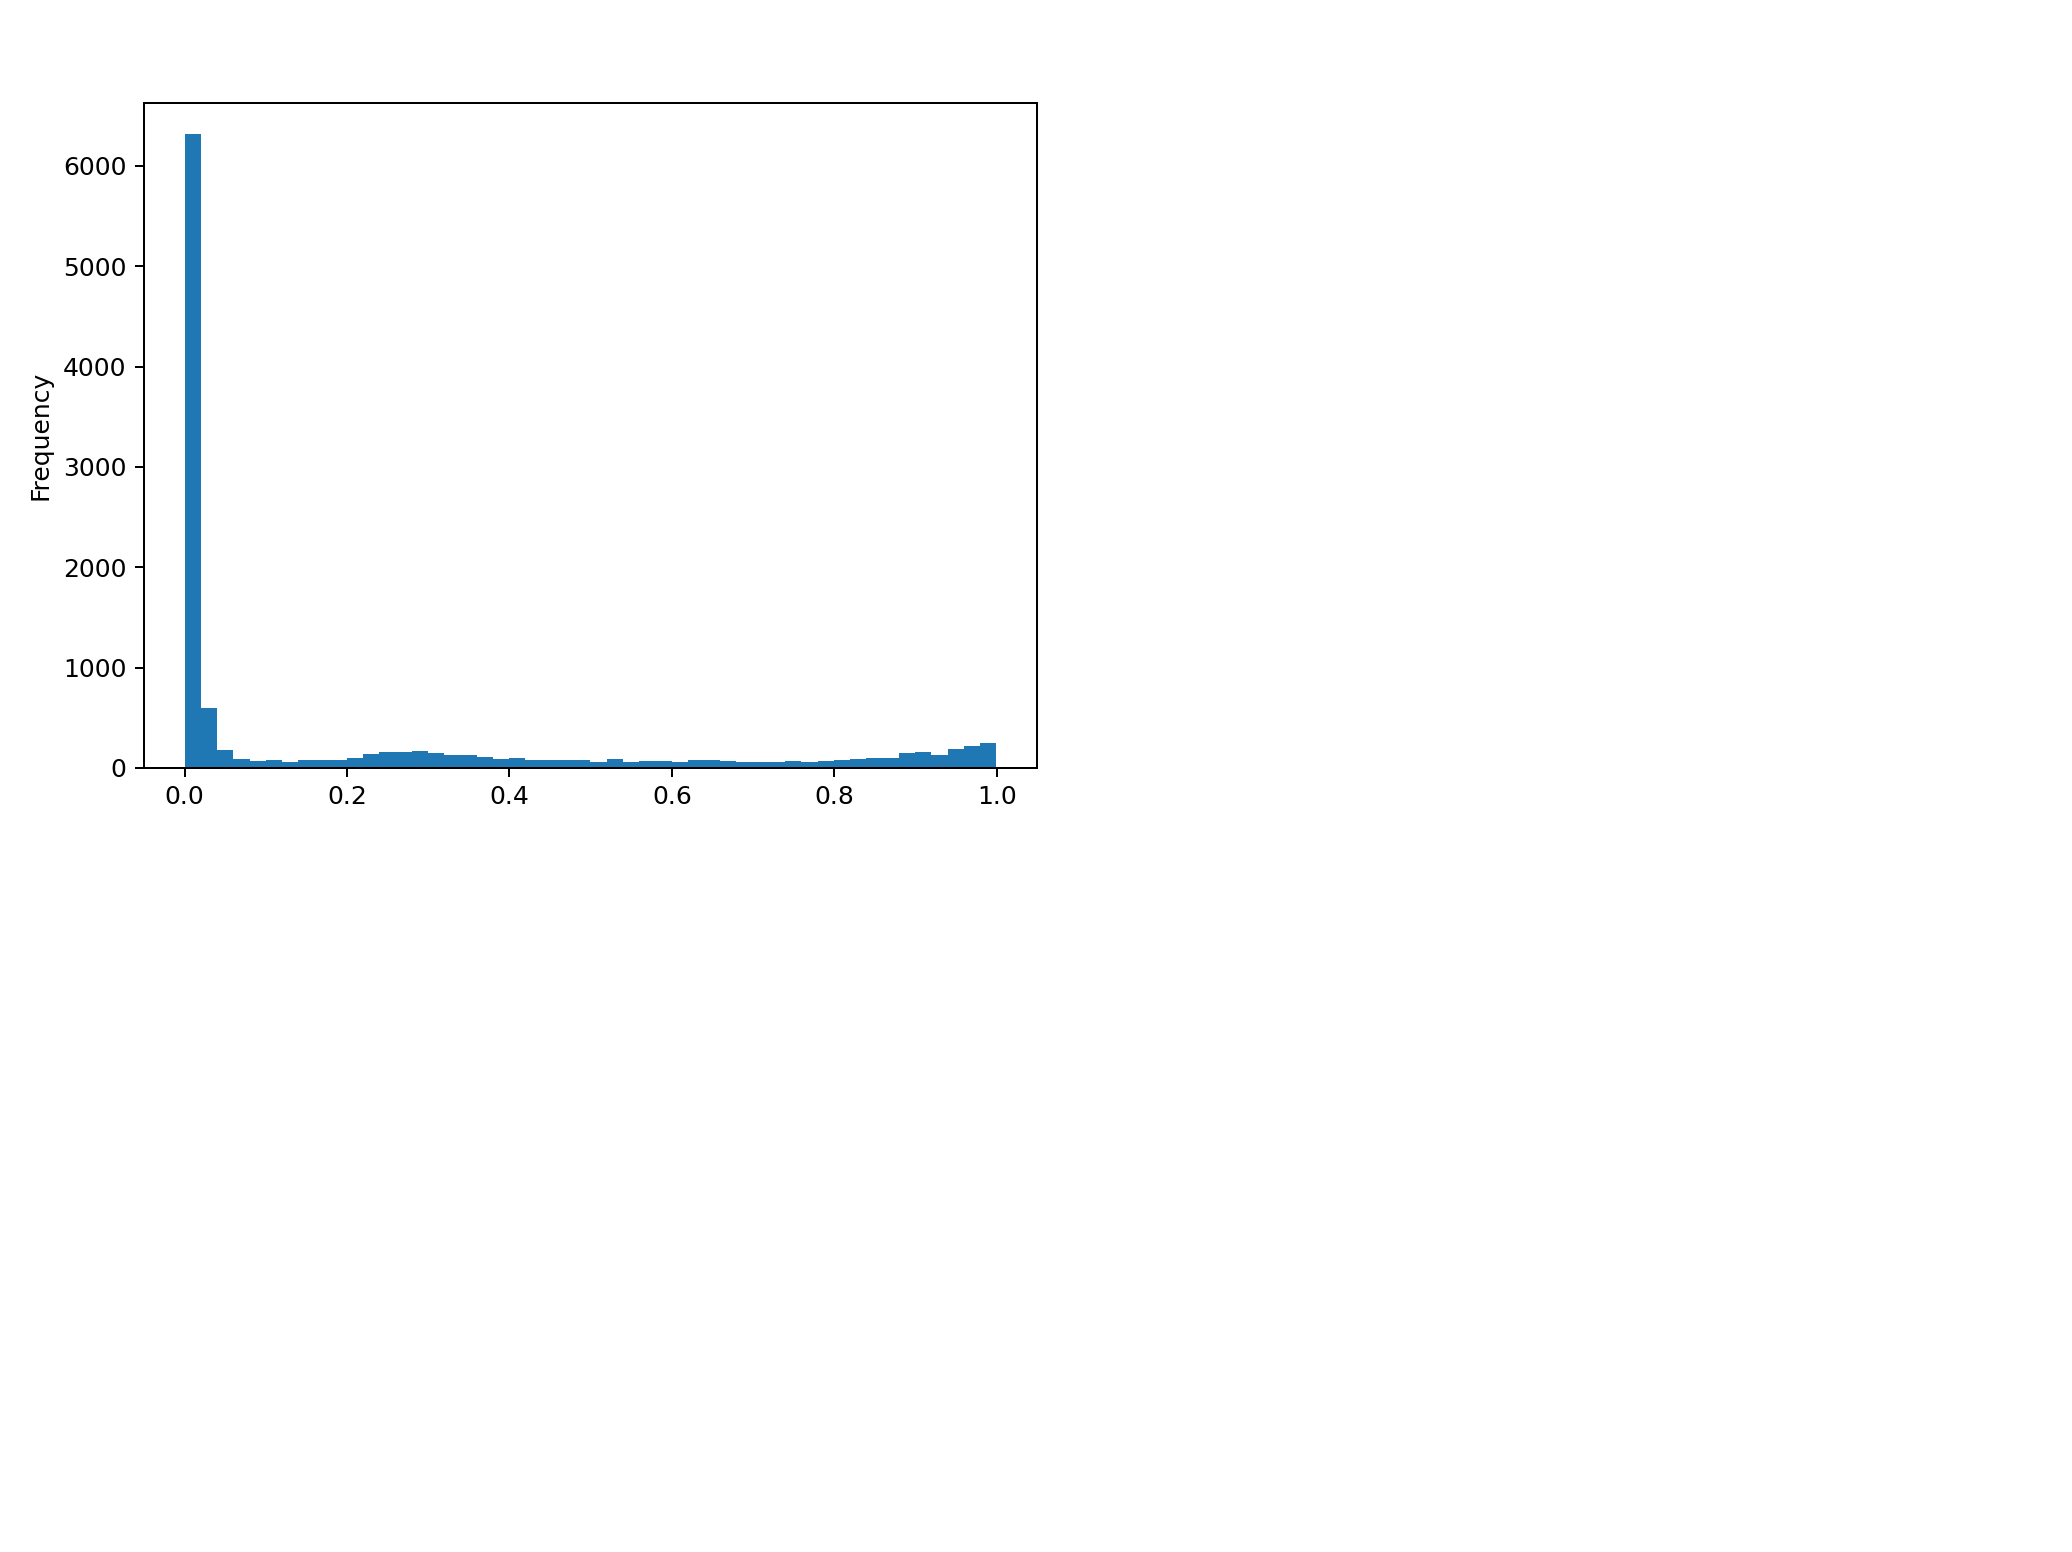

In [88]:
imiss1a['F_MISS'].plot.hist(bins=50)
plt.show()

In [66]:
def filterByGeoDistance2(distance=3000):
    nearPops = Counter(reichLL[reichLL.Distance2Yemen < distance].Group_Label)
    return [nearPop for nearPop, count in nearPops.items() if 2*count > allPops[nearPop]]

allPops = Counter(reich.Population)
filterByGeoDistance2(1000)

['Afar.WGA',
 'Saudi',
 'Yemeni',
 'Jew_Yemenite',
 'Eritrea',
 'Yemeni_Highlands',
 'Yemeni_Highlands_Raymah',
 'Yemeni_Northwest',
 'Yemeni_Desert',
 'Yemeni_Desert2',
 'Jew_Yemenite.DG']

In [59]:
len(Counter(reich.Population))

2397

In [27]:
from collections import Counter
Counter(reich.Group_Label).most_common()

[('Sweden_Viking.SG', 132),
 ('GWD.SG', 112),
 ('YRI.SG', 108),
 ('TSI.SG', 108),
 ('CHS.SG', 106),
 ('GIH.SG', 106),
 ('JPT.SG', 104),
 ('IBS.SG', 103),
 ('ITU.SG', 103),
 ('CHB.SG', 103),
 ('LWK.SG', 101),
 ('PUR.SG', 100),
 ('CDX.SG', 99),
 ('ESN.SG', 99),
 ('STU.SG', 99),
 ('CEU.SG', 99),
 ('FIN.SG', 97),
 ('KHV.SG', 97),
 ('PJL.SG', 96),
 ('CLM.SG', 94),
 ('ACB.SG', 93),
 ('GBR.SG', 92),
 ('BEB.SG', 86),
 ('MSL.SG', 85),
 ('Spain_C', 77),
 ('Denmark_Viking.SG', 71),
 ('PEL.SG', 69),
 ('MXL.SG', 64),
 ('Dominican_LaCaleta_Ceramic', 62),
 ('ASW.SG', 60),
 ('Germany_EN_LBK', 54),
 ('France_MN', 43),
 ('Spain_MLN', 42),
 ('Han.SDG', 42),
 ('Palestinian.SDG', 40),
 ('Switzerland_LN', 39),
 ('Germany_BellBeaker', 37),
 ('Druze.SDG', 37),
 ('Czech_BellBeaker', 36),
 ('Russia_MLBA_Sintashta', 35),
 ('Italy_Imperial.SG', 35),
 ('Spain_EBA', 34),
 ('Taiwan_Hanben_IA', 34),
 ('Estonia_EarlyViking.SG', 34),
 ('Israel_MLBA', 32),
 ('Scotland_N', 30),
 ('Germany_Lech_EBA', 30),
 ('Serbia_IronGa

In [28]:
Counter(reichAncient.Group_Label).most_common()

[('Sweden_Viking.SG', 132),
 ('Spain_C', 77),
 ('Denmark_Viking.SG', 71),
 ('Dominican_LaCaleta_Ceramic', 62),
 ('Germany_EN_LBK', 54),
 ('France_MN', 43),
 ('Spain_MLN', 42),
 ('Switzerland_LN', 39),
 ('Germany_BellBeaker', 37),
 ('Czech_BellBeaker', 36),
 ('Russia_MLBA_Sintashta', 35),
 ('Italy_Imperial.SG', 35),
 ('Spain_EBA', 34),
 ('Taiwan_Hanben_IA', 34),
 ('Estonia_EarlyViking.SG', 34),
 ('Israel_MLBA', 32),
 ('Scotland_N', 30),
 ('Germany_Lech_EBA', 30),
 ('Serbia_IronGates_Mesolithic', 29),
 ('Pakistan_Loebanr_IA', 29),
 ('England_Viking.SG', 29),
 ('Norway_Viking.SG', 27),
 ('Ireland_MN.SG', 26),
 ('England_C_EBA', 25),
 ('Turkey_Alalakh_MLBA', 25),
 ('Russia_Viking.SG', 25),
 ('Cuba_CanimarAbajo_Archaic', 24),
 ('India_RoopkundA', 23),
 ('Iceland_Pre_Christian.SG', 23),
 ('Russia_Afanasievo', 22),
 ('Pakistan_Katelai_IA', 22),
 ('England_N', 21),
 ('Germany_EarlyMedieval.SG', 21),
 ('Turkmenistan_C_Geoksyur', 20),
 ('Mongolia_LBA_Khovsgol_6', 20),
 ('Turkmenistan_Gonur_BA_1'

In [37]:
missingness = 0.1
plinkfile = f'yemen_reich{reichset}_mind{missingness}'
plinkfile

fam = pd.read_csv(f'{plinkfile}.fam', sep=' ', header=None)
fam['Id'] = [iid.split('_')[-1] for iid in fam[1]]

fam.set_index('Id')

In [16]:
#reichMeta = reich[['Id','Region']].set_index('Id')
#reich.head(1)

In [15]:
reich[reich.Date==0]

,Id,mId,Date,Region,Region1
189,A_Han-4.DG,HGDP00778,0,Ignore_Han(discovery).DG,China
190,A_Mbuti-5.DG,HGDP00456,0,Ignore_Mbuti(discovery).DG,Congo
191,A_Karitiana-4.DG,HGDP00998,0,Ignore_Karitiana(discovery).DG,Brazil
192,A_Yoruba-4.DG,HGDP00927,0,Ignore_Yoruba(discovery).DG,Nigeria
193,A_Sardinian-4.DG,HGDP00665,0,Ignore_Sardinian(discovery).DG,Italy
...,...,...,...,...,...
6528,HGDP01203.SDG,HGDP01203,0,Oroqen.SDG,China
6529,HGDP00796.SDG,HGDP00796,0,Orcadian.SDG,Orkney Islands
6989,JHF05.SG,JHF05.SG,0,Malaysia_Jehai_dup.JHM06.SG,Malaysia
6990,JHM06.SG,JHM06.SG,0,Malaysia_Jehai.SG,Malaysia


In [7]:
#vids = set(reich.vId)
#mids = set(reich.Id)

#vidsCount = 0 
#midsCount = 0
#for line in open('yemen_clean_reich1240K4.fam'):
#    f = line.split()[1]
#    if f in vids: vidsCount += 1
#    if f in mids: midsCount += 1
#vidsCount, midsCount

(9275, 3037)

In [6]:
set(reich.vid)

,Index,vId,Id,Date
0,1,I0626_all,I0626,3850
1,2,I0627_all,I0627,3949
2,3,I1137_all_published,I1137,3758
3,4,I1859_all,I1859,3762
4,5,I2497_all,I2497,1950


In [24]:
reich.columns = ['Index', 'Id', 'Id2',
       'Publication', 'contact',
       'Date',
       'Full_Date',
       'Region', 'Locality', 'RegionCountry', 'Lat', 'Long',
       'Data source', 'Cov_autosm',
       'SNPs_autosm', 'Sex',
       'Library_type',
       'ASSESSMENT']
## QC: Keep only samples that don't start with "Ignore_"
reich = reich[~reich.Group_Label.str.startswith("Ignore_")]
reich = reich[~reich.Group_Label.str.endswith("_outlier")]
#reich = reich[reich.Date==0] ## contemporary only
reichMeta = reich[['Id','Region']].set_index('Id')
reichMeta

ValueError: Length mismatch: Expected axis has 43 elements, new values have 18 elements

In [17]:
!ls -l Reich/*.anno

-rw-rw-r--. 1 ahenschel ahenschel 3824404 Jan 21  2021 Reich/v44.3_1240K_public.anno
-rw-rw-r--. 1 ahenschel ahenschel 2425471 Jan 19  2021 Reich/v44.3_HO_public.anno


In [6]:
lmiss = pd.read_csv('yemen_clean_reich1240K4_stats.lmiss', delim_whitespace=True)
lmiss.head()

,CHR,SNP,N_MISS,N_GENO,F_MISS
0,1,rs3094315,3172,9444,0.3359
1,1,rs6687776,2669,9444,0.2826
2,1,rs9442373,3223,9444,0.3413
3,1,rs2298217,3316,9444,0.3511
4,1,rs9442380,3627,9444,0.3841


In [4]:
df = pd.DataFrame({
    'length': [1.5, 0.5, 1.2, 0.9, 3],
    'width': [0.7, 0.2, 0.15, 0.2, 1.1]
    }, index=['pig', 'rabbit', 'duck', 'chicken', 'horse'])
df

,length,width
pig,1.5,0.70
rabbit,0.5,0.20
duck,1.2,0.15
chicken,0.9,0.20
horse,3.0,1.10


<AxesSubplot:ylabel='Frequency'>

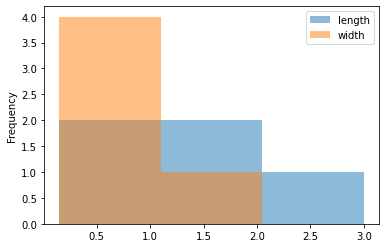

In [11]:
df.plot.hist(bins=3, alpha=0.5)

In [9]:
h

array([[<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'width'}>]], dtype=object)

In [10]:
h.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'